<a href="https://colab.research.google.com/github/jvan120/capstone/blob/main/Beer_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Beer Ratings from Beer Profile Reviews

This project aims to develop a predictive model for beer ratings using comprehensive beer profiles. By analyzing features like beer style and multiple reviews (i.e. aroma, appearance, taste, palate, and number of reviews), we seek to understand what factors most influence a beer's overall rating.

## Dataset Acquisition and Analysis/Cleaning and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("beer_profile_and_ratings.csv")

In [ ]:
df.head(5)

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


Cleaning up the data to see the field that I want to see and dropping the 'Description' field because I will not be needing it.

In [ ]:
columns_to_drop = ['Description']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
object_columns = [i for i in df.columns if df[i].dtype=="O"]

In [ ]:
object_columns

['Name', 'Style', 'Brewery', 'Beer Name (Full)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   ABV                3197 non-null   float64
 5   Min IBU            3197 non-null   int64  
 6   Max IBU            3197 non-null   int64  
 7   Astringency        3197 non-null   int64  
 8   Body               3197 non-null   int64  
 9   Alcohol            3197 non-null   int64  
 10  Bitter             3197 non-null   int64  
 11  Sweet              3197 non-null   int64  
 12  Sour               3197 non-null   int64  
 13  Salty              3197 non-null   int64  
 14  Fruits             3197 non-null   int64  
 15  Hoppy              3197 non-null   int64  
 16  Spices             3197 


Displaying Value counts for each column and splitting the "Style" to get clearer data that I can use better.


In [ ]:
for i in object_columns:
    display(df[i].value_counts())
    print("_____________________________________________________________________________________________")

Oktoberfest                                 12
Porter                                      10
Smoked Porter                                9
Christmas Ale                                6
IPA                                          5
                                            ..
Vinyl                                        1
Barking Squirrel Lager                       1
Redbridge                                    1
ZiegenBock Amber                             1
Frosted Frog Christmas Ale - Barrel-Aged     1
Name: Name, Length: 3066, dtype: int64

_____________________________________________________________________________________________


Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Brett Beer                          3
Sour - Gose                         3
Name: Style, Length: 111, dtype: int64

_____________________________________________________________________________________________


Boston Beer Company (Samuel Adams)    40
Dogfish Head Brewery                  31
Anheuser-Busch                        30
Three Floyds Brewing Co. & Brewpub    29
Victory Brewing Company               23
                                      ..
Asia Pacific Breweries Ltd.            1
Boon Rawd Brewery Co., Ltd             1
Birra Moretti (Heineken)               1
Stella Artois                          1
Natty Greene's Pub & Brewing Co.       1
Name: Brewery, Length: 934, dtype: int64

_____________________________________________________________________________________________


Alaskan Brewing Co. Alaskan Amber                                 1
Ranger Creek Brewing & Distilling Mesquite Smoked Porter - MSP    1
Grey Sail Brewing of Rhode Island Leaning Chimney Porter          1
8 Wired Brewing Co. The Big Smoke                                 1
East End Brewing Company Smokestack Heritage Porter               1
                                                                 ..
Anheuser-Busch Redbridge                                          1
Anheuser-Busch ZiegenBock Amber                                   1
August Schell Brewing Company Grain Belt Nordeast                 1
Capital Brewery Wisconsin Amber                                   1
Hoppin' Frog Brewery Barrel Aged Frosted Frog Christmas Ale       1
Name: Beer Name (Full), Length: 3197, dtype: int64

_____________________________________________________________________________________________


In [ ]:
for i in object_columns:
    print(i,"nunique:", df[i].nunique())
    print("_______________________________________\n")

Name nunique: 3066
_______________________________________

Style nunique: 111
_______________________________________

Brewery nunique: 934
_______________________________________

Beer Name (Full) nunique: 3197
_______________________________________



In [ ]:
style_split = df["Style"].str.split("/", expand=True)
style_split


,0,1
0,Altbier,None
1,Altbier,None
2,Altbier,None
3,Altbier,None
4,Altbier,None
...,...,...
3192,Winter Warmer,None
3193,Winter Warmer,None
3194,Winter Warmer,None
3195,Winter Warmer,None


In [ ]:
style_split[0].nunique()


111

In [ ]:
style_split[1].nunique()

13

In [ ]:
style_split[1].unique()

array([None, ' Strong Bitter (ESB)', ' Bière Brut', ' Steam Beer',
       ' Ancient Herbed Ale', ' Cascadian Dark Ale', ' Red',
       ' Dortmunder Export', ' Zwickelbier', ' Oktoberfest', ' Czech',
       ' Wee Heavy', ' Export', ' Milk'], dtype=object)

In [ ]:
df[["Style1", "Style2"]] = df["Style"].str.split("/", expand=True)


In [ ]:
df.head(5)

,Name,Style,Brewery,Beer Name (Full),ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,...,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,Style1,Style2
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,5.3,25,50,13,32,9,...,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497,Altbier,None
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,7.2,25,50,12,57,18,...,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481,Altbier,None
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,5.0,25,50,14,37,6,...,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377,Altbier,None
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,8.5,25,50,13,55,31,...,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368,Altbier,None
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,7.2,25,50,25,51,26,...,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96,Altbier,None


In [ ]:
df.drop(["Name", "Style", "Brewery", "Beer Name (Full)", "ABV", "Min IBU", "Max IBU", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty"], axis=1, inplace=True)
df

,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,Style1,Style2
0,3.498994,3.636821,3.556338,3.643863,3.847082,497,Altbier,None
1,3.798337,3.846154,3.904366,4.024948,4.034304,481,Altbier,None
2,3.409814,3.667109,3.600796,3.631300,3.830239,377,Altbier,None
3,4.148098,4.033967,4.150815,4.205163,4.005435,368,Altbier,None
4,3.625000,3.973958,3.734375,3.765625,3.817708,96,Altbier,None
...,...,...,...,...,...,...,...,...
3192,4.125000,3.875000,3.875000,3.750000,4.000000,4,Winter Warmer,None
3193,3.950000,3.750000,3.760000,3.790000,3.730000,50,Winter Warmer,None
3194,3.576923,3.711538,3.596154,3.673077,3.711538,26,Winter Warmer,None
3195,3.902299,3.885057,3.862069,3.902299,3.879310,87,Winter Warmer,None


## Exploratory Data Analysis (EDA)
Using EDA to nderstand the main characteristics of your data, uncover underlying patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

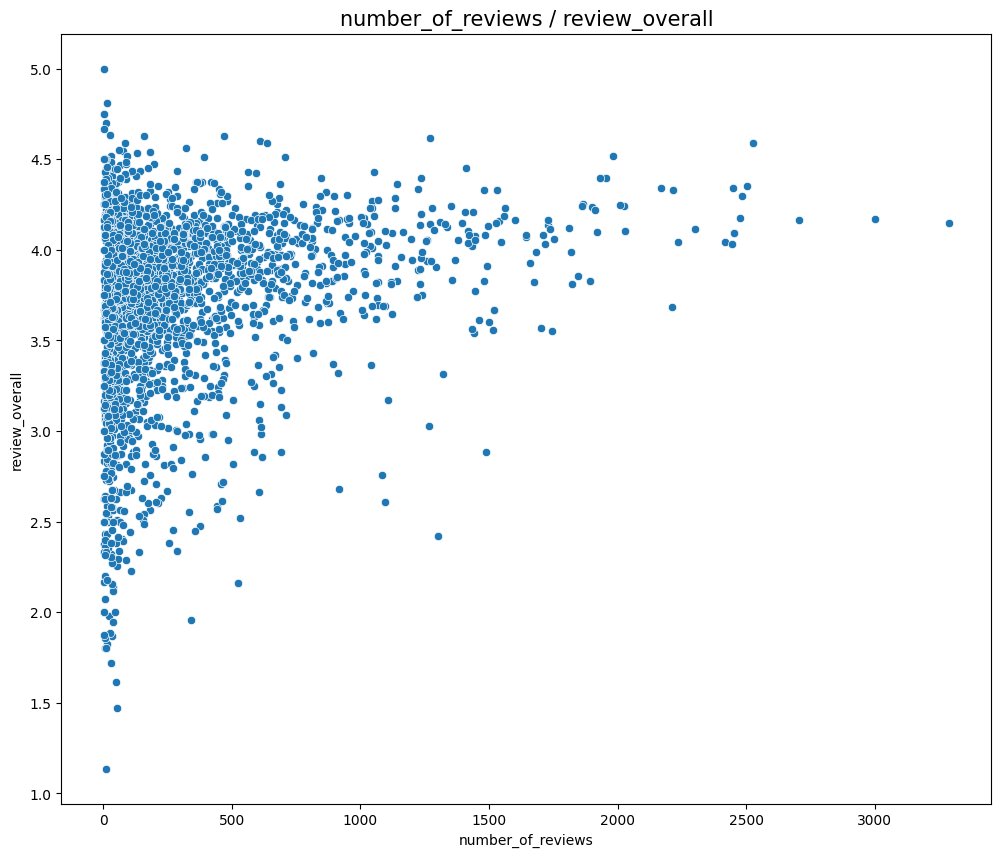

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="number_of_reviews", y="review_overall", data=df)
plt.title("number_of_reviews / review_overall", fontsize=15)
plt.show()


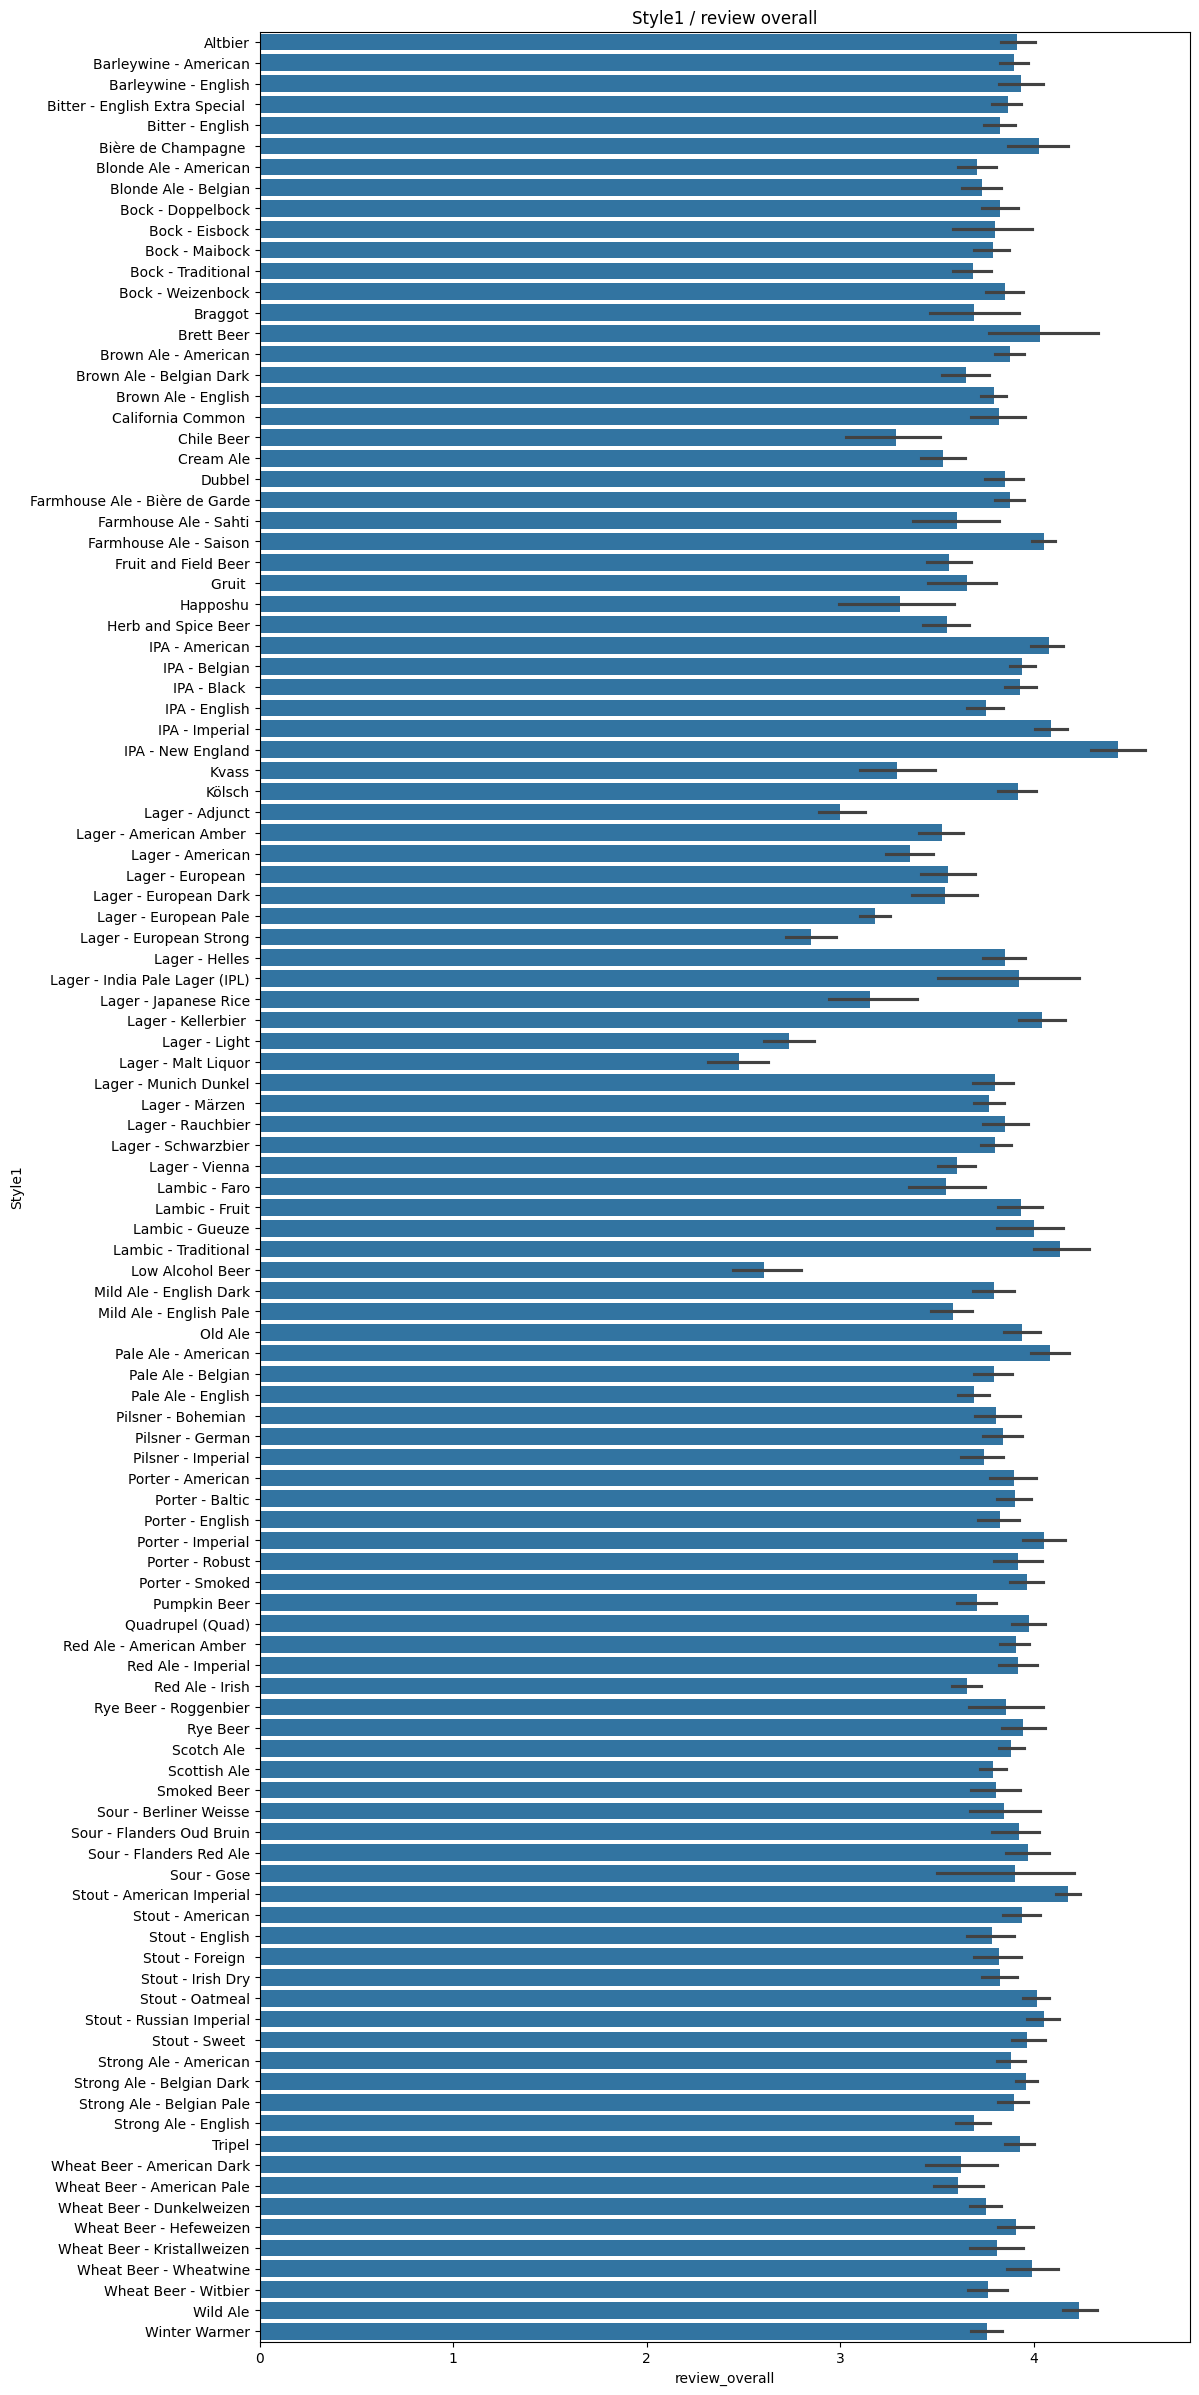

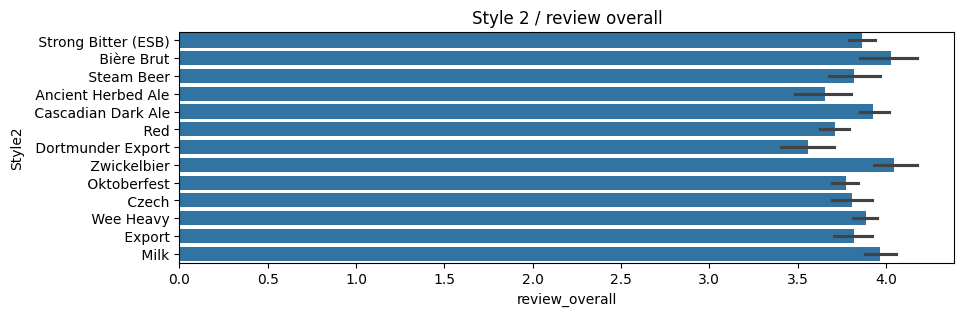

In [ ]:
plt.figure(figsize=(12,30))
sns.barplot(x="review_overall", y="Style1", data=df)
plt.title("Style1 / review overall", fontsize=12)
plt.show()
plt.figure(figsize=(10,3))
sns.barplot(x="review_overall", y="Style2", data=df)
plt.title("Style 2 / review overall", fontsize=12)
plt.show()

In [ ]:
beer = pd.get_dummies(df, columns=["Style1", "Style2"], drop_first=True)
df

,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews,Style1,Style2
0,3.498994,3.636821,3.556338,3.643863,3.847082,497,Altbier,None
1,3.798337,3.846154,3.904366,4.024948,4.034304,481,Altbier,None
2,3.409814,3.667109,3.600796,3.631300,3.830239,377,Altbier,None
3,4.148098,4.033967,4.150815,4.205163,4.005435,368,Altbier,None
4,3.625000,3.973958,3.734375,3.765625,3.817708,96,Altbier,None
...,...,...,...,...,...,...,...,...
3192,4.125000,3.875000,3.875000,3.750000,4.000000,4,Winter Warmer,None
3193,3.950000,3.750000,3.760000,3.790000,3.730000,50,Winter Warmer,None
3194,3.576923,3.711538,3.596154,3.673077,3.711538,26,Winter Warmer,None
3195,3.902299,3.885057,3.862069,3.902299,3.879310,87,Winter Warmer,None


## Model Development and training
Implementing a machine learning pipeline to predict the "review_overall" variable of a dataset using Support Vector Regression (SVR). The process starts with data preparation, where categorical and numerical features are identified from the dataset df. Numerical features are standardized using StandardScaler to have mean zero and unit variance, while categorical features are encoded into one-hot vectors using OneHotEncoder to handle categorical data effectively. These preprocessing steps are combined into a single ColumnTransformer, ensuring that appropriate transformations are applied to each type of feature. This transformer, along with the SVR model, is then integrated into a Pipeline to streamline the process from raw data to predictions. The dataset is split into training and testing sets to evaluate the model's performance. You utilize RandomizedSearchCV for hyperparameter tuning, searching over a specified grid of SVR hyperparameters (C, epsilon, and gamma) to find the optimal combination based on cross-validated performance. After training, the best hyperparameters and the corresponding performance score are printed, demonstrating the effectiveness of the chosen model configuration. This approach not only automates the process of feature preprocessing and model training but also optimizes the model's hyperparameters for better prediction accuracy on the task of estimating overall reviews.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numeric_features = df.select_dtypes(exclude=['object']).drop(["review_overall"], axis=1).columns.tolist()
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

X = df.drop(["review_overall"], axis=1)
y = df["review_overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

params = {
    "model__C": np.logspace(-3, 3, 7),
    "model__epsilon": np.logspace(-3, 0, 4),
    "model__gamma": ['scale', 'auto'] + list(np.logspace(-3, 1, 5))
}

model = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=30, n_jobs=-1, cv=3, verbose=1)

model.fit(X_train, y_train)

print("Best parameters:", model.best_params_)
print("Best score:", model.best_score_)



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'model__gamma': 'auto', 'model__epsilon': 0.1, 'model__C': 10.0}
Best score: 0.9171703016682562


## Evaluation
This evaluation is assessing the performance of a trained model by calculating the R^2  score, also known as the coefficient of determination, on both the training and test datasets. The R^2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's predicted from the independent variables. It provides an indication of the goodness of fit of the model and ranges from 0 to 1, where a higher score suggests a better fit of the model to the data.



In [ ]:

train_r2_score = model.score(X_train, y_train)
print(f"Training R^2 score: {train_r2_score}")


test_r2_score = model.score(X_test, y_test)
print(f"Test R^2 score: {test_r2_score}")



Training R^2 score: 0.9311812655318475
Test R^2 score: 0.9150567216793264


Prediction Widget steps:
1. Move slider for eachreview criteria.
2. Select Style 1 and Style 2.
3. Press "Predict Overall Review" Button
4. RESULTS: The overall review is predicted based on the interface settings and dataset.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

review_aroma = widgets.FloatSlider(description='Aroma', min=0, max=5, step=0.1, value=2.5)
review_appearance = widgets.FloatSlider(description='Appearance', min=0, max=5, step=0.1, value=2.5)
review_palate = widgets.FloatSlider(description='Palate', min=0, max=5, step=0.1, value=2.5)
review_taste = widgets.FloatSlider(description='Taste', min=0, max=5, step=0.1, value=2.5)
number_of_reviews = widgets.IntSlider(description='Number of Reviews', min=1, max=100, step=1, value=10)

style1_options = ['Lager', 'Mild Ale', 'Pale Ale']
style2_options = ['Amber/Red', 'Dark', 'Malty']
style1 = widgets.Dropdown(options=style1_options, description='Style1')
style2 = widgets.Dropdown(options=style2_options, description='Style2')

predict_button = widgets.Button(description="Predict Overall Review")
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()

        input_df = pd.DataFrame([[
            review_aroma.value, review_appearance.value, review_palate.value,
            review_taste.value, number_of_reviews.value, style1.value, style2.value
        ]], columns=['review_aroma', 'review_appearance', 'review_palate', 'review_taste',
                     'number_of_reviews', 'Style1', 'Style2'])

        prediction = model.predict(input_df)
        print(f"Predicted Overall Review: {prediction[0]:.2f}")

predict_button.on_click(on_predict_clicked)

input_widgets = widgets.VBox([review_aroma, review_appearance, review_palate, review_taste,
                              number_of_reviews, style1, style2, predict_button])
display(input_widgets, output)




Output()

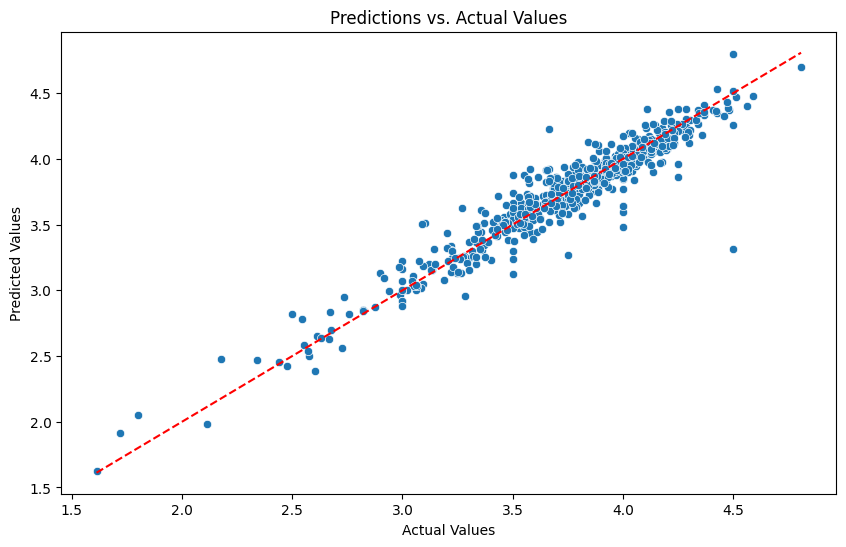

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


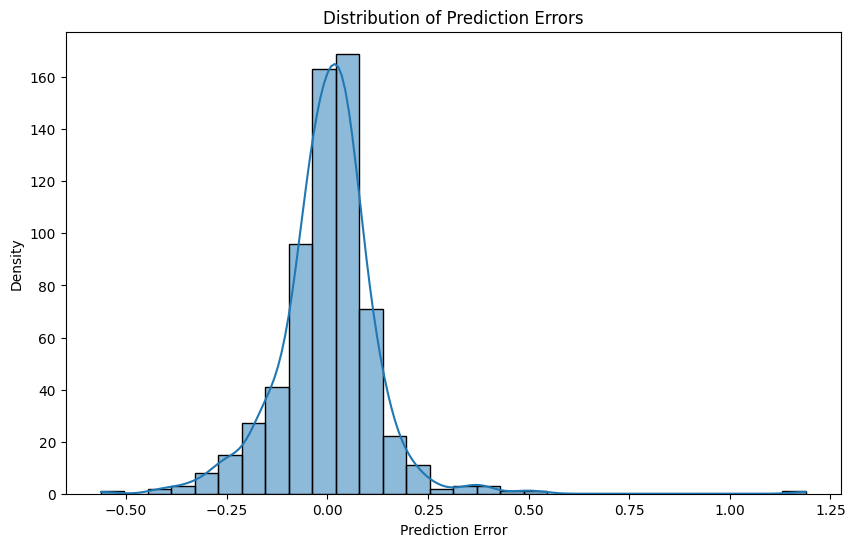

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Distribution of Prediction Errors')
plt.show()


## Documentation and findings

See Task 2 final paper for a detailed description of all findings.